In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
place_df = pd.read_csv('/home/abhimanyu/Desktop/ML_Project/placement-project-logistic-regression/placement.csv')

In [3]:
place_df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
place_df = place_df.iloc[:,1:]

In [6]:
place_df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


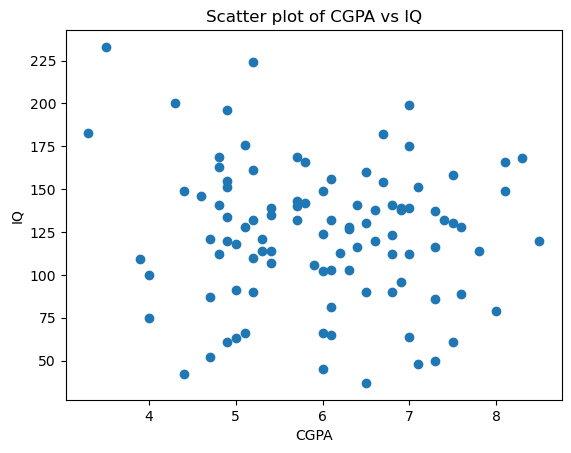

In [8]:
# Assuming df is your DataFrame containing 'cgpa' and 'iq' columns
plt.scatter(place_df['cgpa'], place_df['iq'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Scatter plot of CGPA vs IQ')
plt.show()

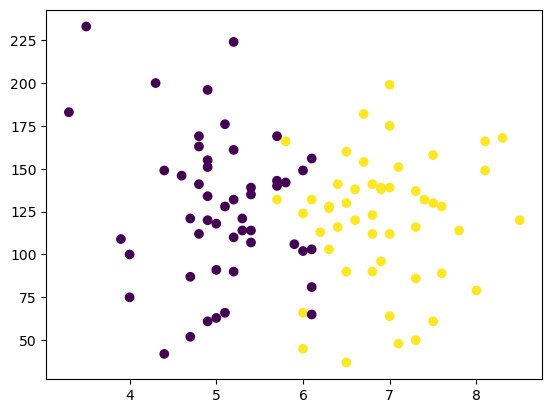

In [9]:
plt.scatter(place_df['cgpa'], place_df['iq'], c= place_df['placement'])